# Create inputs for adaptive binning routines

This notebook create images needed to exercise the various adaptive binning routines.

In [1]:
date

Wed Jan  6 12:11:51 EST 2021


In [2]:
ciaover 

CIAO 4.13 Wednesday, December  2, 2020
  bindir      : /soft/ciao-4.13/bin
  CALDB       : 4.9.4


In [3]:
download_chandra_obsid 13201 evt1,asol,bpix,flt,fov,msk,mtl,stat,pbk,dtf,bias


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      108 Mb  ####################           39 s  2826.3 kb/s
  asol     fits       12 Mb  ####################            4 s  3510.7 kb/s
  mtl      fits        2 Mb  ####################          < 1 s  6382.8 kb/s
  stat     fits        1 Mb  ####################          < 1 s  2292.7 kb/s
  bias     fits      434 Kb  ####################          < 1 s  1166.3 kb/s
  bias     fits      433 Kb  ####################          < 1 s  2261.8 kb/s
  bias     fits      432 Kb  ####################          < 1 s  2293.6 kb/s
  bias     fits      430 Kb  ####################          < 1 s  2294.6 kb/s
  bias     fits      424 Kb  ####################          < 1 s  1698.8 kb/s
  bpix     fits       68 Kb  ####################          < 1 s  533.9 kb/s
  flt      fits        7 Kb  ####################          < 1 s

In [4]:
chandra_repro 13201 out=./


Running chandra_repro
version: 01 December 2020


Processing input directory '/home/kjg/AdaptiveBin/CIAO413/13201'

Applying boresight update to aspect solution file
Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Output from acis_process_events:
# acis_process_events (CIAO 4.13): WARNING: The ra_targ, dec_targ, or roll_nom specified by /home/kjg/AdaptiveBin/CIAO413/pcadf13201_repro_obs.par does not match the values in the event file- using the obs.par values.
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /home/kjg/AdaptiveBin/CIAO413/acisf13201_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel file in local ardlib.par.

Cleaning up intermedia

In [5]:
fluximage acisf13201_repro_evt2.fits"[ccd_id=0:3]" out=abell665 band=broad bin=2 clob+ psfecf=0.9

Running fluximage
Version: 01 April 2020

Using CSC ACIS broad science energy band.
Aspect solution pcadf13201_repro_asol1.fits found.
Bad-pixel file acisf13201_repro_bpix1.fits found.
Mask file acisf13201_000N002_msk1.fits found.

The output images will have 1405 by 1408 pixels, pixel size of 0.984 arcsec,
    and cover x=2656.5:5466.5:2,y=2850.5:5666.5:2.

Running tasks in parallel with 8 processors.
Creating aspect histograms for obsid 13201
Creating 4 instrument maps for obsid 13201
Creating 4 exposure maps for obsid 13201
Combining 4 exposure maps for obsid 13201
Thresholding data for obsid 13201
Exposure-correcting image for obsid 13201
Creating PSF map for obsid 13201

The following files were created:

 The clipped counts image is:
     abell665_broad_thresh.img

 The clipped exposure map is:
     abell665_broad_thresh.expmap

 The PSF map is:
     abell665_broad_thresh.psfmap

 The exposure-corrected image is:
     abell665_broad_flux.img



In [6]:
curl -O http://soliton.vm.bytemark.co.uk/pub/cpt-city/neota/othr/sunset-in-atlantis.sao

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   673  100   673    0     0   1348      0 --:--:-- --:--:-- --:--:--  1346


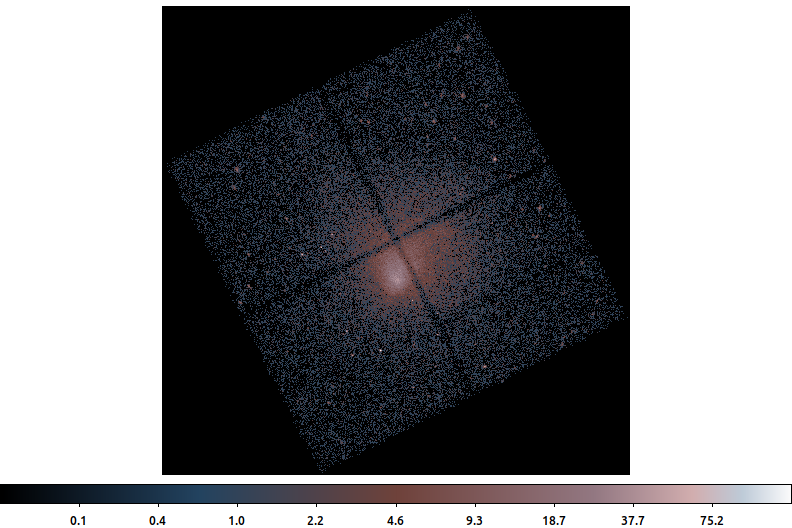

In [7]:
ds9 abell665_broad_thresh.img -scale log -scale limits 0 150 -block to 3 \
    -cmap load sunset-in-atlantis.sao \
    -saveimage png ds9_01.png -exit

display < ds9_01.png

## Remove point sources

In [8]:
punlearn wavdetect wrecon wtransform

pset wavdetect \
  infile=abell665_broad_thresh.img \
  outfile=abell665.src \
  scell=abell665.cell \
  imagef=abell665.recon \
  defn=abell665.nbkg \
  scales="1.4 2 4 8 12 16 24" \
  psffile=abell665_broad_thresh.psfmap \
  expfile=abell665_broad_thresh.expmap \
  clob+

wavdetect mode=h

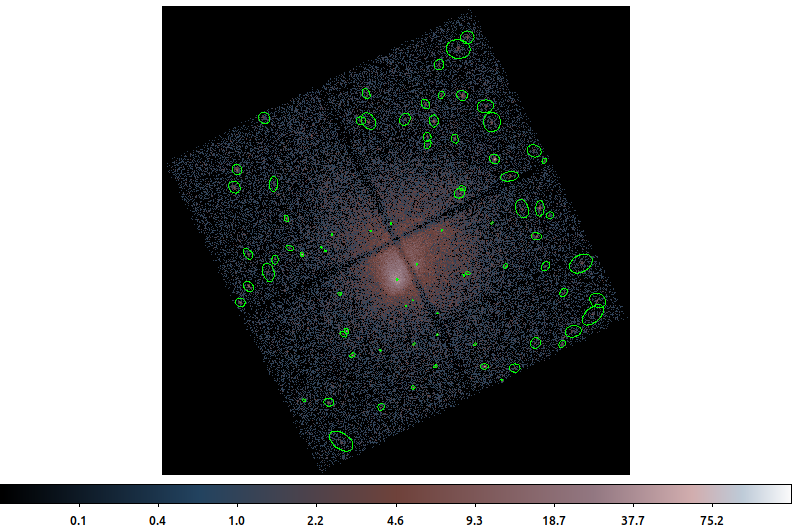

In [9]:
ds9 abell665_broad_thresh.img -scale log -scale limits 0 150 -block to 3 \
    -cmap load sunset-in-atlantis.sao \
    -regions load abell665.src \
    -saveimage png ds9_02.png -exit

display < ds9_02.png

## Preserve cluster

I want to remove the point sources, but I want to keep the cluster.

So I need to filter the soure list to remove the detections associated with the cluster.





In [10]:
aconvolve abell665_broad_thresh.img - "lib:gaus(2,5,5,5,5)" meth=slide edge=const const=0 | \
dmimgfilt - bkg.img median "annulus(0,0,20,22)" mode=h clob+

In [11]:
dmimglasso bkg.img cluster.reg xpos=4096 ypos=4096 coord=phys low=0.34 hi=INDEF max=1000000 clob+

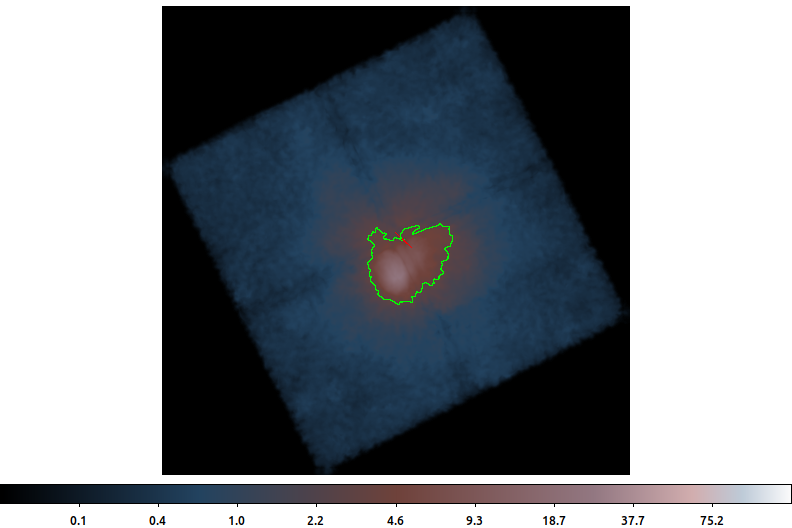

In [12]:
ds9 bkg.img -scale log -scale limits 0 150 -block to 3 \
    -cmap load sunset-in-atlantis.sao \
    -regions load cluster.reg \
    -saveimage png ds9_03.png -exit

display < ds9_03.png

In [13]:
dmcopy "abell665.src[exclude (x,y)=region(cluster.reg)]" srcs_2_fill.reg clob+

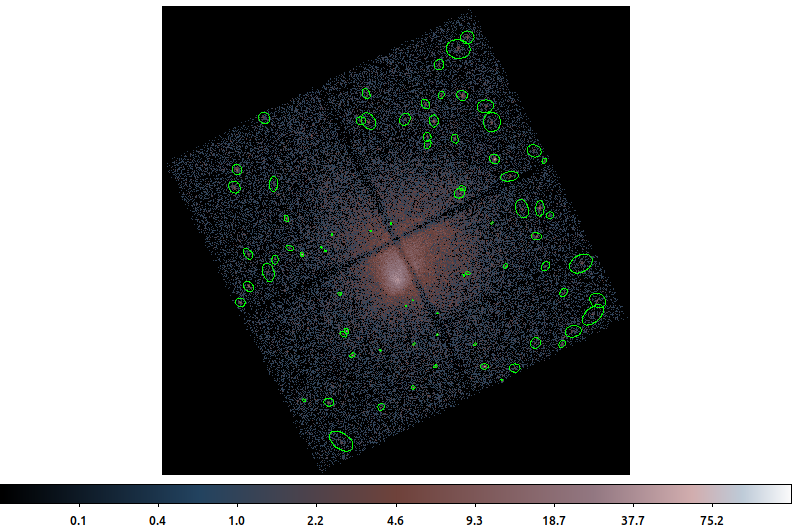

In [14]:
ds9 abell665_broad_thresh.img -scale log -scale limits 0 150 -block to 3 \
    -cmap load sunset-in-atlantis.sao \
    -regions load srcs_2_fill.reg \
    -saveimage png ds9_04.png -exit

display < ds9_04.png

In [15]:
/bin/rm -rf roi 
mkdir -p roi

roi \
  infile= srcs_2_fill.reg \
  fovreg="region(acisf13201_repro_fov1.fits)" \
  outsrc=roi/src_%04d.reg \
  radiusmode=mul bkgrad=3 \
  group=individual targetbkg=target \
  bkgfactor=1 \
  mode=h clob+

In [16]:
/bin/ls roi/sr*reg | sed "s,.*,region(&)," > s.reg
/bin/ls roi/sr*reg | sed "s,.*,region(&[bkgreg])," > b.reg

In [17]:
dmfilth abell665_broad_thresh.img \
  out=abell665_xfill.img \
  src=@-s.reg \
  bkg=@-b.reg \
  method=POISSON \
  mode=h clob+

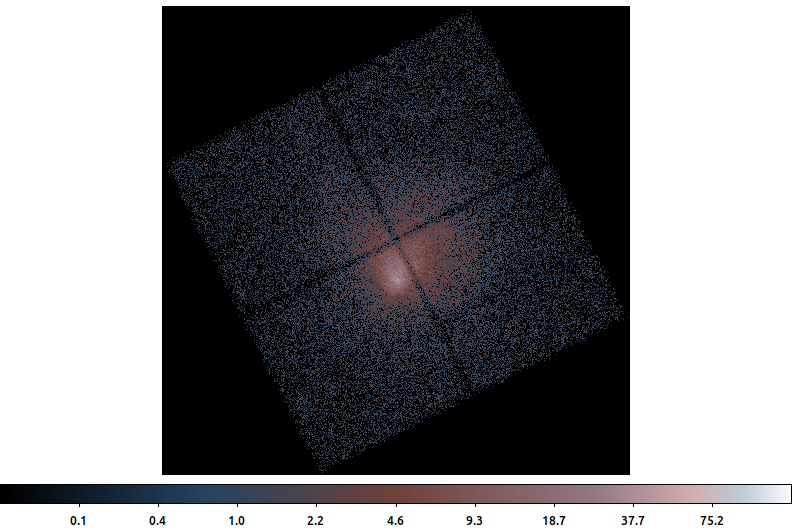

In [18]:
ds9 abell665_xfill.img -scale log -scale limits 0 150 -block to 3 \
    -cmap load sunset-in-atlantis.sao \
    -saveimage png ds9_05.png -exit

display < ds9_05.png

In [19]:
# We need to be sure the subspace has FOV boundary 

dmcopy abell665_xfill.img"[sky=region(acisf13201_repro_fov1.fits[ccd_id=0:3])][opt full]" \
  abell665_fill.img clob+

## Smoothing

### Adaptive Smoothing

In [20]:
dmimgadapt abell665_fill.img abell665_fill.asm \
  gaus min=0.5 max=25 numrad=50 radscal=line counts=49 \
  mode=h clob+ radfile=abell665_fill.asm.radii

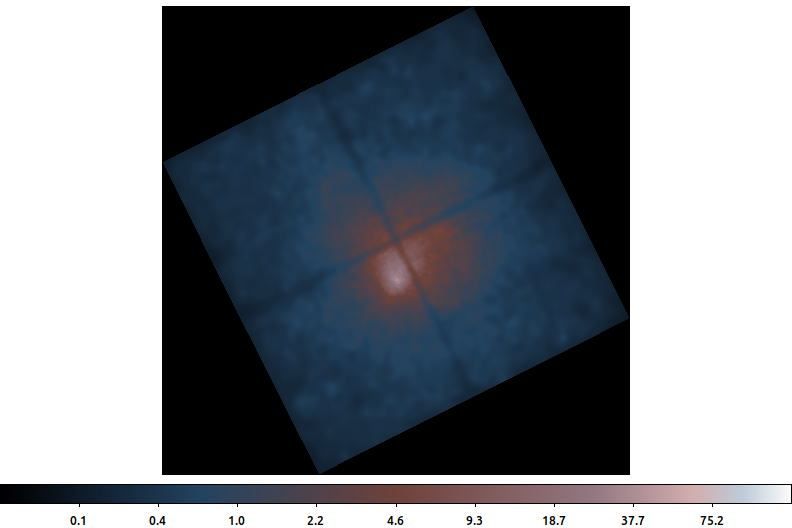

In [21]:
ds9 abell665_fill.asm -scale log -scale limits 0 150 -block to 3 \
    -cmap load sunset-in-atlantis.sao \
    -saveimage png abell665_fill.asm.png -exit

display < abell665_fill.asm.png

In [22]:
dmimgcalc abell665_fill.asm.radii none unit.img op="imgout=((img1-img1)+1)" clob+

In [23]:
dmimgadapt abell665_broad_thresh.expmap abell665.expmap.asm \
  gaus min=0.5 max=25 numrad=50 radscal=line counts=49 \
  mode=h clob+ inradfile=abell665_fill.asm.radii \
  innorm=unit.img 

# dmimgadapt (CIAO 4.13): The following error occurred 879399 times:



In [24]:
dmimgcalc abell665_fill.asm abell665.expmap.asm - div | \
  dmcopy "-[sky=region(acisf13201_repro_fov1.fits[ccd_id=0:3])][opt full]" abell665.flux.asm clob+

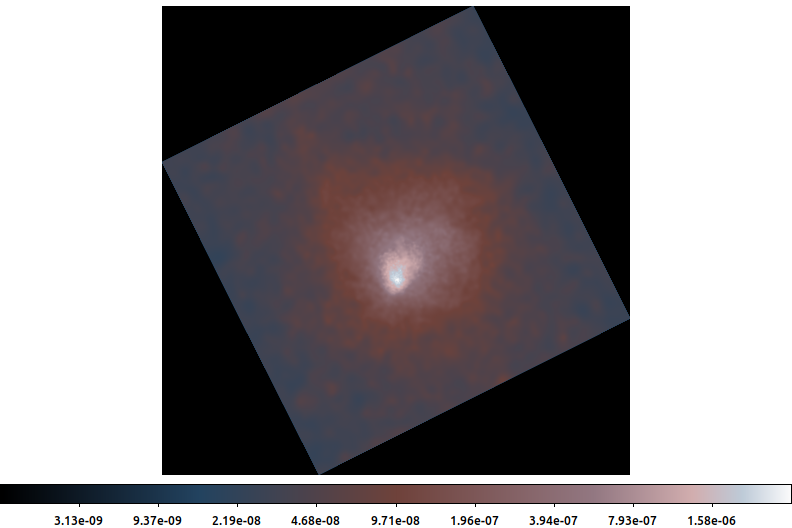

In [25]:
ds9 abell665.flux.asm -scale log -block to 3 \
    -cmap load sunset-in-atlantis.sao \
    -saveimage png abell665.flux.asm.png -exit

display < abell665.flux.asm.png

### Linear Smoothing

In [26]:
aconvolve  abell665_fill.img sm.img "lib:gaus(2,5,5,9,9)" met=slide edge=cons const=0 clob+
aconvolve  abell665_broad_thresh.expmap sm.exp "lib:gaus(2,5,5,9,9)" met=slide edge=cons const=0 clob+
dmimgcalc sm.img sm.exp - div lookup="" | \
  dmcopy "-[sky=region(acisf13201_repro_fov1.fits[ccd_id=0:3])][opt full]" sm.flux clob+


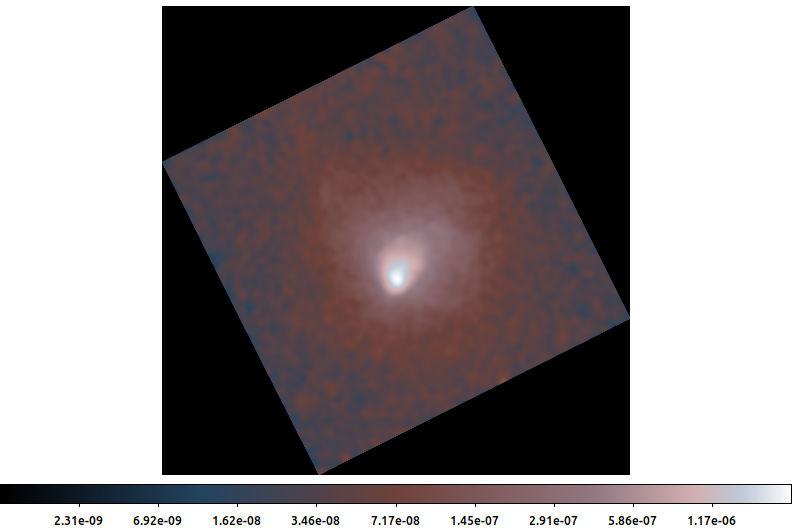

In [27]:
ds9 sm.flux -scale log -block to 3 \
    -cmap load sunset-in-atlantis.sao \
    -saveimage png sm.flux.png -exit

display < sm.flux.png